In [ ]:
srun -G1 --pty bash -c "source /data/ai_club/team_3_2024-25/team3-env-finetune/bin/activate; \
    hostname; \
    jupyter notebook \
        --ServerApp.root_dir=$(pwd) \
        --ServerApp.password='' \
        --ServerApp.open_browser=False \
        --ServerApp.allow_origin='*' \
        --ServerApp.allow_remote_access=True \
        --ServerApp.port=14321 \
        --ServerApp.ip='*'
"

In [3]:
%env IM_MODE old-mask_new-ops

import im_llm
import importlib
importlib.reload(im_llm)

from matplotlib import pyplot as plt
import json

env: IM_MODE=old-mask_new-ops


In [23]:
model, tokenize, tokenizer, tokof = im_llm.get_model()
print(model)

Qwen2ForCausalLM(
  (model): Qwen2Model(
    (embed_tokens): Embedding(151936, 896)
    (layers): ModuleList(
      (0-23): 24 x IMDecoderLayer(
        (original_layer): Qwen2DecoderLayer(
          (self_attn): Qwen2Attention(
            (q_proj): Linear(in_features=896, out_features=896, bias=True)
            (k_proj): Linear(in_features=896, out_features=128, bias=True)
            (v_proj): Linear(in_features=896, out_features=128, bias=True)
            (o_proj): Linear(in_features=896, out_features=896, bias=False)
          )
          (mlp): Qwen2MLP(
            (gate_proj): Linear(in_features=896, out_features=4864, bias=False)
            (up_proj): Linear(in_features=896, out_features=4864, bias=False)
            (down_proj): Linear(in_features=4864, out_features=896, bias=False)
            (act_fn): SiLU()
          )
          (input_layernorm): Qwen2RMSNorm((896,), eps=1e-06)
          (post_attention_layernorm): Qwen2RMSNorm((896,), eps=1e-06)
        )
      )
   

In [35]:
tokens = tokenize([
    'Here\'s my story: I took the',
    'I don\'t like taking the',
    'Eat a balanced and nutritious'
])

# im_llm.IMDecoderLayer.mask = im_llm.gen_mask(tokens)
im_llm.IMDecoderLayer.mask = [tokof('bus'), tokof(' bus')]

out = model.generate(
# out = model(
    **tokens,
    # labels=tokens['input_ids'],
    max_new_tokens=1,
    pad_token_id=tokenizer.eos_token_id,
    temperature=0.001,
    do_sample=True,
    return_dict_in_generate=True,
    output_hidden_states=True
)

# out

out_ids = out['sequences']
print(tokenizer.decode(out_ids[1]))

I don't like taking the<|endoftext|><|endoftext|>,


In [25]:
im_llm.load_weights(100)

/home/grall/Documents/aiClub/lltm/LLTM/llm_core/finetune/im_llm.py:146: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  IMDecoderLayer.vspace_to_emb.load_state_dict(torch.load

In [9]:
%ls /data/ai_club/team_3_2024-25/weights

block_strength100.json  post_ff_norm3.pth     vspace_to_emb2.pth
block_strength200.json  post_ff_norm4.pth     vspace_to_emb3.pth
block_strength4.json    vspace_to_emb100.pth  vspace_to_emb4.pth
losses100.json          vspace_to_emb200.pth  vspace_to_emb.pth


In [36]:
with open('/data/ai_club/team_3_2024-25/weights/losses100.json', 'r') as f:
    losses = json.load(f)

with open('/data/ai_club/team_3_2024-25/weights/block_strength200.json', 'r') as f:
    strengths = json.load(f)

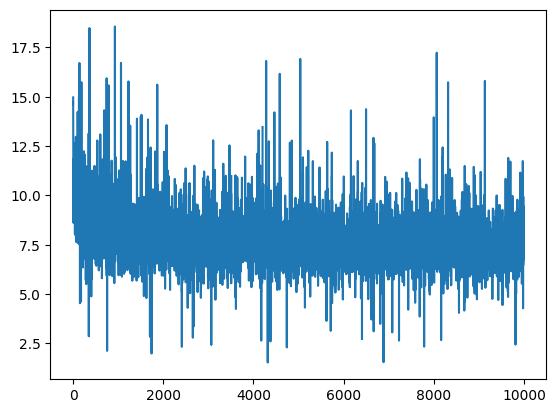

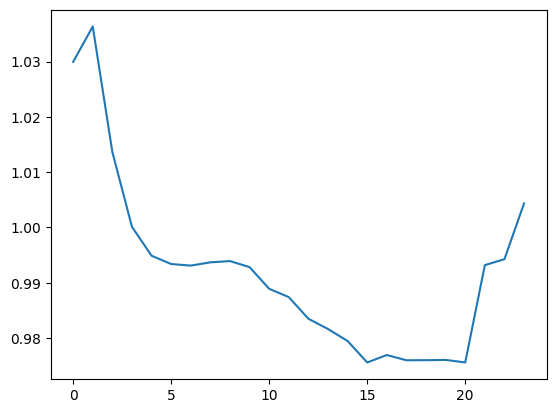

In [37]:
plt.plot(losses) ; plt.show()
plt.plot(strengths) ; plt.show()